# Prophet Exploration

In this Notebook I explore using Facebook Prophet.

In [16]:
import pandas as pd
from fbprophet import Prophet

In [17]:
!wget -O testData.csv https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv

path = 'testData.csv'


--2020-08-25 23:30:38--  https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86845 (85K) [text/plain]
Saving to: ‘testData.csv’

testData.csv        100%[===================>]  84.81K  --.-KB/s    in 0.1s    

2020-08-25 23:30:39 (654 KB/s) - ‘testData.csv’ saved [86845/86845]



In [18]:
df = pd.read_csv(path)
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [19]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


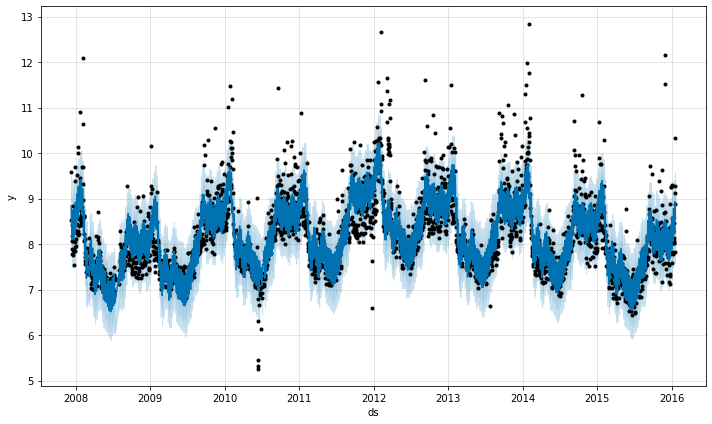

In [20]:
figure = m.plot(m.predict()) #plot itself as it currently stands

In [21]:
future = m.make_future_dataframe(periods = 365*5)

In [22]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041239,8.228544,9.523213,8.041239,8.041239,0.802931,0.802931,0.802931,0.352295,0.352295,0.352295,0.450636,0.450636,0.450636,0.0,0.0,0.0,8.844170
1,2007-12-11,8.039695,7.998659,9.250035,8.039695,8.039695,0.553003,0.553003,0.553003,0.119639,0.119639,0.119639,0.433364,0.433364,0.433364,0.0,0.0,0.0,8.592697
2,2007-12-12,8.038151,7.798018,8.973021,8.038151,8.038151,0.350363,0.350363,0.350363,-0.066664,-0.066664,-0.066664,0.417027,0.417027,0.417027,0.0,0.0,0.0,8.388514
3,2007-12-13,8.036607,7.736076,8.950307,8.036607,8.036607,0.329817,0.329817,0.329817,-0.072254,-0.072254,-0.072254,0.402070,0.402070,0.402070,0.0,0.0,0.0,8.366423
4,2007-12-14,8.035063,7.692124,8.980860,8.035063,8.035063,0.319321,0.319321,0.319321,-0.069578,-0.069578,-0.069578,0.388900,0.388900,0.388900,0.0,0.0,0.0,8.354384


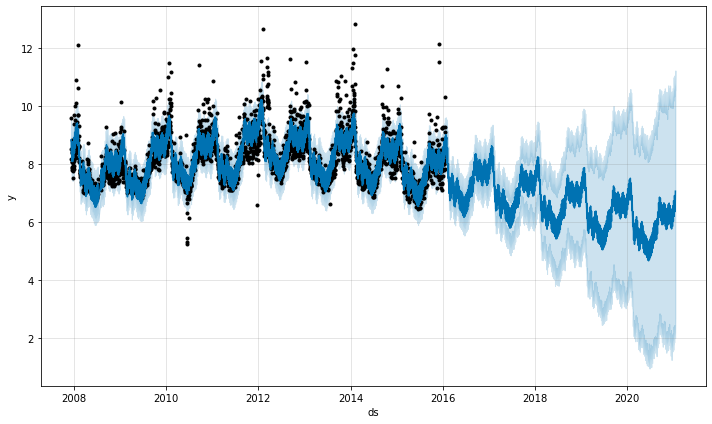

In [23]:
figure = m.plot(forecast) #plotted with the extra data

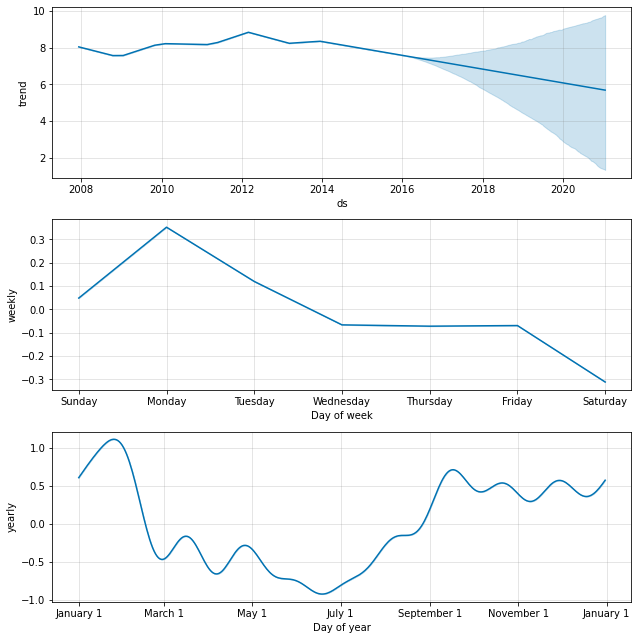

In [24]:
figure = m.plot_components(forecast)

In [25]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [271]:
import pickle

class Model:
    def __init__(self,model):
        if (isinstance(model,str)):
            self.model = self.loadModel(model)
        else:
            self.model = model

    def saveModel(self,path):
        with open (path, "wb") as f:
            pickle.dump(self.model, f)   
            
    def loadModel(self, path):
        with open(path, 'rb') as f:
            return pickle.load(f)

class ProphetModel(Model):
    def __init__(self,model):
        super().__init__(model)
    
    def predict(self,input_feature):
        y = self.model.predict(input_feature)
        return y

class SKlearnModel(Model):
    def __init__(self,model):
        super().__init__(model)
    
    def predict(self,input_feature):
        y = self.model.predict(input_feature)
        return y


[5]